<h2 align="center">AtliQ Hotels Data Analysis Project<h2>

In [1]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

In [2]:
import os

In [3]:
os.chdir(r"C:/Users/anshi/OneDrive/Desktop/Data analyst/Python/Module _1/3_project_hospitality_analysis/")

**Read bookings data in a dataframe**

In [4]:
df_bookings = pd.read_csv("datasets/fact_bookings.csv")

In [ ]:
**Explore bookings data**

In [5]:
print(df_bookings.head(4))

         booking_id  property_id booking_date check_in_date checkout_date  \
0  May012216558RT11        16558     27-04-22      1/5/2022      2/5/2022   
1  May012216558RT12        16558     30-04-22      1/5/2022      2/5/2022   
2  May012216558RT13        16558     28-04-22      1/5/2022      4/5/2022   
3  May012216558RT14        16558     28-04-22      1/5/2022      2/5/2022   

   no_guests room_category booking_platform  ratings_given booking_status  \
0       -3.0           RT1    direct online            1.0    Checked Out   
1        2.0           RT1           others            NaN      Cancelled   
2        2.0           RT1          logtrip            5.0    Checked Out   
3       -2.0           RT1           others            NaN      Cancelled   

   revenue_generated  revenue_realized  
0              10010             10010  
1               9100              3640  
2            9100000              9100  
3               9100              3640  


In [6]:
df_bookings.shape

(134590, 12)

In [7]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [8]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [9]:
import matplotlib.pyplot as plt

<Axes: ylabel='booking_platform'>

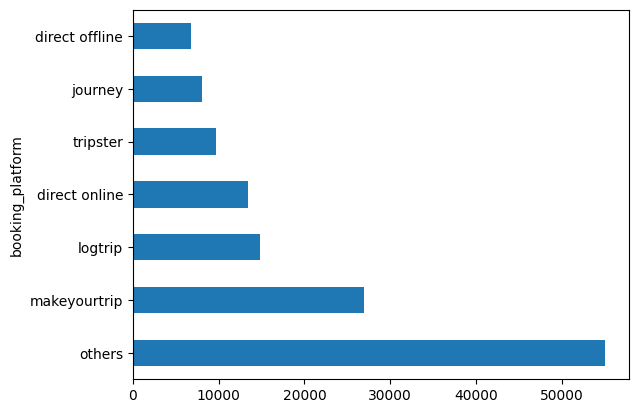

In [10]:
df_bookings.booking_platform.value_counts().plot(kind="barh")

In [11]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [12]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [ ]:
**Read rest of the files**

In [13]:
df_date = pd.read_csv(r"C:/Users/anshi/OneDrive/Desktop/Data analyst/Python/Module _1/3_project_hospitality_analysis/datasets/dim_date.csv")
df_hotels = pd.read_csv(r"C:/Users/anshi/OneDrive/Desktop/Data analyst/Python/Module _1/3_project_hospitality_analysis/datasets/dim_hotels.csv")
df_rooms = pd.read_csv(r"C:/Users/anshi/OneDrive/Desktop/Data analyst/Python/Module _1/3_project_hospitality_analysis/datasets/dim_rooms.csv")
df_agg_bookings=pd.read_csv(r"C:/Users/anshi/OneDrive/Desktop/Data analyst/Python/Module _1/3_project_hospitality_analysis/datasets/fact_aggregated_bookings.csv")

In [14]:
df_hotels.shape

(25, 4)

In [15]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [16]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: ylabel='city'>

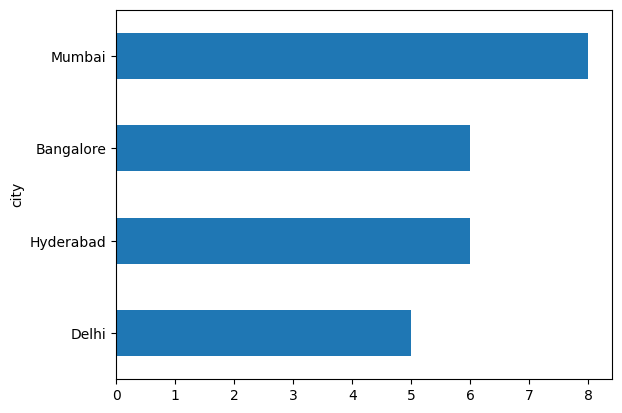

In [17]:
df_hotels.city.value_counts().sort_values().plot(kind = "barh")

In [18]:
df_agg_bookings.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [19]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560], dtype=int64)

In [20]:
df_agg_bookings.property_id.value_counts()

property_id
16559    368
17559    368
17564    368
19561    368
19559    368
18563    368
18562    368
18561    368
18559    368
18558    368
17563    368
17562    368
16563    368
19562    368
16562    368
16561    368
16560    368
17561    368
19560    368
19558    368
17560    368
16558    368
17558    368
19563    368
18560    368
Name: count, dtype: int64

In [21]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [22]:
df_agg_bookings.capacity.max()

50.0

In [23]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [ ]:
***
### ==> 2. Data Cleaning
***

In [24]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


In [25]:
df_bookings=df_bookings[df_bookings.no_guests>0]

In [26]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [27]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(6500, 28560000)

In [28]:
avg,std = df_bookings.revenue_generated.mean(),df_bookings.revenue_generated.std()

In [29]:
avg,std

(15378.036937686695, 93040.1549314641)

In [30]:
higher_limit = avg+3*std

In [31]:
higher_limit

294498.50173207896

In [32]:
lower_limit = avg-3*std
lower_limit

-263742.4278567056

In [33]:
df_bookings[df_bookings.revenue_generated > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [34]:
df_bookings=df_bookings[df_bookings.revenue_generated < higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [35]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [36]:
higher_limit =df_bookings.revenue_realized.mean() +3*df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [37]:
lower_limit =df_bookings.revenue_realized.mean() -3*df_bookings.revenue_realized.std()
lower_limit

-8087.391491611072

In [38]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


In [39]:
df_bookings[df_bookings.room_category== 'RT4'].revenue_realized.describe()

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [40]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [41]:
23439.308444 +3*9048.599076

50585.105672000005

In [42]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [43]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [44]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [45]:
df_agg_bookings[df_agg_bookings.capacity.isnull()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [46]:
df_agg_bookings.capacity.median()

25.0

In [47]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [48]:
df_agg_bookings.iloc[8:16]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
9,16560,1-May-22,RT1,24,34.0
10,16561,1-May-22,RT1,16,18.0
11,16562,1-May-22,RT1,20,31.0
12,16563,1-May-22,RT1,100,41.0
13,17559,1-May-22,RT1,26,32.0
14,17562,1-May-22,RT1,12,25.0
15,17563,1-May-22,RT1,21,25.0


In [49]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [50]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [51]:
df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]


In [52]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
3,17558,1-May-22,RT1,30,19.0,1.578947
4,16558,1-May-22,RT1,18,19.0,0.947368
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,0.722222
9196,16559,31-Jul-22,RT4,13,18.0,0.722222
9197,17558,31-Jul-22,RT4,3,6.0,0.500000
9198,19563,31-Jul-22,RT4,3,6.0,0.500000


In [53]:
df_agg_bookings["occ_pct"]=df_agg_bookings["occ_pct"].apply(lambda x :round(x*100,2))

In [54]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
3,17558,1-May-22,RT1,30,19.0,157.89
4,16558,1-May-22,RT1,18,19.0,94.74
...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22
9196,16559,31-Jul-22,RT4,13,18.0,72.22
9197,17558,31-Jul-22,RT4,3,6.0,50.00
9198,19563,31-Jul-22,RT4,3,6.0,50.00


In [55]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9200 non-null   float64
 5   occ_pct              9200 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 431.4+ KB


In [56]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)

room_category
RT1    58.23
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [57]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [58]:
df=pd.merge(df_agg_bookings , df_rooms, left_on ="room_category", right_on="room_id")
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,RT1,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
...,...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential


In [59]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.23
Name: occ_pct, dtype: float64

In [60]:
df.drop("room_id",axis=1,inplace=True)
df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,17558,1-May-22,RT1,30,19.0,157.89,Standard
4,16558,1-May-22,RT1,18,19.0,94.74,Standard
...,...,...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential
9196,16559,31-Jul-22,RT4,13,18.0,72.22,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,Presidential


In [ ]:
***
### ==> 3. Data Transformation
***

In [61]:
df_city=pd.merge(df,df_hotels,on="property_id")
df_city

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai
3,16559,4-May-22,RT1,21,30.0,70.00,Standard,Atliq Exotica,Luxury,Mumbai
4,16559,5-May-22,RT1,16,30.0,53.33,Standard,Atliq Exotica,Luxury,Mumbai
...,...,...,...,...,...,...,...,...,...,...
9195,18560,27-Jul-22,RT4,6,15.0,40.00,Presidential,Atliq City,Business,Hyderabad
9196,18560,28-Jul-22,RT4,9,15.0,60.00,Presidential,Atliq City,Business,Hyderabad
9197,18560,29-Jul-22,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad
9198,18560,30-Jul-22,RT4,9,15.0,60.00,Presidential,Atliq City,Business,Hyderabad


<Axes: xlabel='city'>

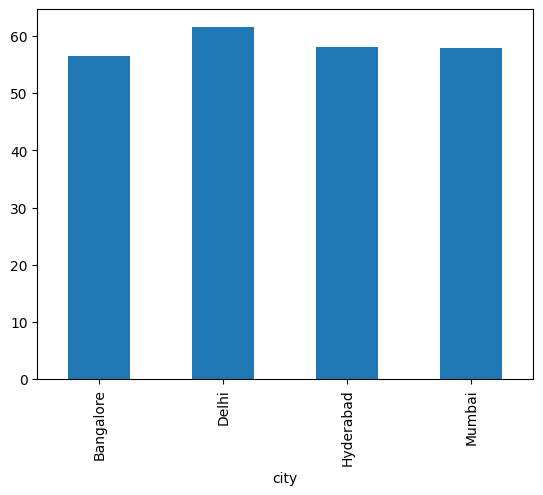

In [62]:
df_city.groupby("city")["occ_pct"].mean().round(2).plot(kind ="bar")

In [63]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [64]:
df_check = pd.merge(df_city, df_date, left_on='check_in_date', right_on='date')
df_check

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,17564,31-Jul-22,RT4,10,17.0,58.82,Presidential,Atliq Seasons,Business,Mumbai,31-Jul-22,Jul 22,W 32,weekend
6496,18560,31-Jul-22,RT1,22,30.0,73.33,Standard,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6497,18560,31-Jul-22,RT2,34,40.0,85.00,Elite,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend
6498,18560,31-Jul-22,RT3,17,24.0,70.83,Premium,Atliq City,Business,Hyderabad,31-Jul-22,Jul 22,W 32,weekend


In [65]:
df_check.drop("date",axis=1, inplace=True)
df_check

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
3,16559,10-May-22,RT4,13,18.0,72.22,Presidential,Atliq Exotica,Luxury,Mumbai,May 22,W 20,weekeday
4,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6495,17564,31-Jul-22,RT4,10,17.0,58.82,Presidential,Atliq Seasons,Business,Mumbai,Jul 22,W 32,weekend
6496,18560,31-Jul-22,RT1,22,30.0,73.33,Standard,Atliq City,Business,Hyderabad,Jul 22,W 32,weekend
6497,18560,31-Jul-22,RT2,34,40.0,85.00,Elite,Atliq City,Business,Hyderabad,Jul 22,W 32,weekend
6498,18560,31-Jul-22,RT3,17,24.0,70.83,Premium,Atliq City,Business,Hyderabad,Jul 22,W 32,weekend


In [ ]:
***
### ==> 4. Insights Generation
***

<Axes: ylabel='day_type'>

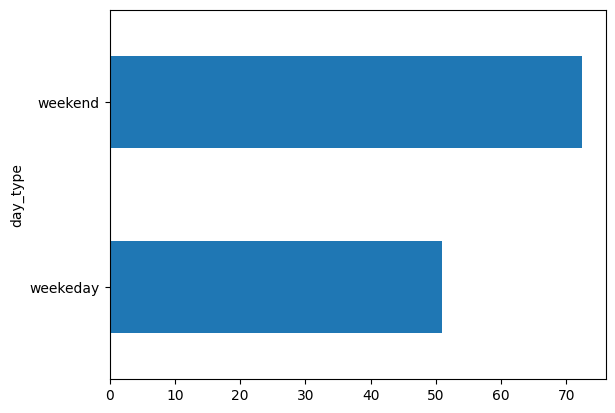

In [66]:
df_check.groupby("day_type")["occ_pct"].mean().plot(kind="barh")

In [67]:
Jun_22=df_check[df_check["mmm yy"]=="Jun 22"]
Jun_22

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,17564,30-Jun-22,RT4,7,17.0,41.18,Presidential,Atliq Seasons,Business,Mumbai,Jun 22,W 27,weekeday
4296,18560,30-Jun-22,RT1,18,30.0,60.00,Standard,Atliq City,Business,Hyderabad,Jun 22,W 27,weekeday
4297,18560,30-Jun-22,RT2,24,40.0,60.00,Elite,Atliq City,Business,Hyderabad,Jun 22,W 27,weekeday
4298,18560,30-Jun-22,RT3,14,24.0,58.33,Premium,Atliq City,Business,Hyderabad,Jun 22,W 27,weekeday


In [68]:
Jun_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.58
Name: occ_pct, dtype: float64

<Axes: ylabel='city'>

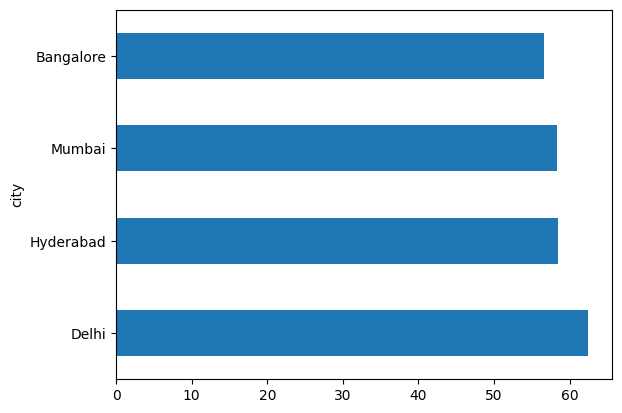

In [69]:
Jun_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False).plot(kind="barh")

In [70]:
df_august = pd.read_csv(r"C:/Users/anshi/OneDrive/Desktop/Data analyst/Python/Module _1/3_project_hospitality_analysis/datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [71]:
df_check["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [72]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [73]:
Jun_22.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [74]:
latest_df=pd.concat([Jun_22,df_august],ignore_index =True, axis =0)
latest_df

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,mmm yy,week no,day_type,occ%
0,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday,NaN
1,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday,NaN
2,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday,NaN
3,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday,NaN
4,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,Jun 22,W 24,weekeday,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2102,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,76.67
2103,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,75.00
2104,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92
2105,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,69.23


In [75]:
df_bookings.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [76]:
df_latestt= pd.merge(latest_df,df_bookings,on="property_id")
df_latestt.head(4)

,property_id,check_in_date_x,room_category_x,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,...,booking_date,check_in_date_y,checkout_date,no_guests,room_category_y,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,28-04-22,1/5/2022,3/5/2022,2.0,RT1,journey,3.0,Checked Out,11050,11050
1,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,29-04-22,1/5/2022,6/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,11050,11050
2,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,27-04-22,1/5/2022,2/5/2022,1.0,RT1,tripster,NaN,Cancelled,11050,4420
3,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,29-04-22,1/5/2022,3/5/2022,3.0,RT1,direct offline,5.0,Checked Out,12155,12155


<Axes: ylabel='city'>

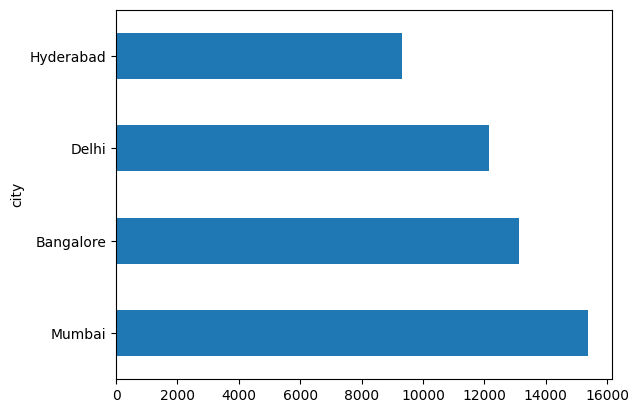

In [77]:
df_latestt.groupby("city")["revenue_realized"].mean().round(2).sort_values(ascending=False).plot(kind="barh")

In [78]:
df_latestt.head()

,property_id,check_in_date_x,room_category_x,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,...,booking_date,check_in_date_y,checkout_date,no_guests,room_category_y,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,28-04-22,1/5/2022,3/5/2022,2.0,RT1,journey,3.0,Checked Out,11050,11050
1,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,29-04-22,1/5/2022,6/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,11050,11050
2,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,27-04-22,1/5/2022,2/5/2022,1.0,RT1,tripster,NaN,Cancelled,11050,4420
3,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,29-04-22,1/5/2022,3/5/2022,3.0,RT1,direct offline,5.0,Checked Out,12155,12155
4,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,29-04-22,1/5/2022,2/5/2022,3.0,RT1,others,5.0,Checked Out,12155,12155


In [79]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          6500 non-null   int64  
 1   check_in_date        6500 non-null   object 
 2   room_category        6500 non-null   object 
 3   successful_bookings  6500 non-null   int64  
 4   capacity             6500 non-null   float64
 5   occ_pct              6500 non-null   float64
 6   room_class           6500 non-null   object 
 7   property_name        6500 non-null   object 
 8   category             6500 non-null   object 
 9   city                 6500 non-null   object 
 10  mmm yy               6500 non-null   object 
 11  week no              6500 non-null   object 
 12  day_type             6500 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 660.3+ KB


In [80]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [81]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [82]:
df_bookings_all = pd.merge(df_latestt, df_date, left_on="check_in_date_x", right_on="date")
df_bookings_all

,property_id,check_in_date_x,room_category_x,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,...,room_category_y,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy_y,week no_y,day_type_y
0,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,journey,3.0,Checked Out,11050,11050,10-Jun-22,Jun 22,W 24,weekeday
1,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,makeyourtrip,5.0,Checked Out,11050,11050,10-Jun-22,Jun 22,W 24,weekeday
2,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,tripster,NaN,Cancelled,11050,4420,10-Jun-22,Jun 22,W 24,weekeday
3,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,direct offline,5.0,Checked Out,12155,12155,10-Jun-22,Jun 22,W 24,weekeday
4,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,others,5.0,Checked Out,12155,12155,10-Jun-22,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304127,18560,30-Jun-22,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad,...,RT4,logtrip,5.0,Checked Out,19000,19000,30-Jun-22,Jun 22,W 27,weekeday
11304128,18560,30-Jun-22,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad,...,RT4,makeyourtrip,3.0,Checked Out,19000,19000,30-Jun-22,Jun 22,W 27,weekeday
11304129,18560,30-Jun-22,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad,...,RT4,others,5.0,Checked Out,26600,26600,30-Jun-22,Jun 22,W 27,weekeday
11304130,18560,30-Jun-22,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad,...,RT4,others,NaN,Cancelled,19000,7600,30-Jun-22,Jun 22,W 27,weekeday


In [83]:
df_bookings_all .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11304132 entries, 0 to 11304131
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   property_id          int64  
 1   check_in_date_x      object 
 2   room_category_x      object 
 3   successful_bookings  int64  
 4   capacity             float64
 5   occ_pct              float64
 6   room_class           object 
 7   property_name        object 
 8   category             object 
 9   city                 object 
 10  mmm yy_x             object 
 11  week no_x            object 
 12  day_type_x           object 
 13  occ%                 float64
 14  booking_id           object 
 15  booking_date         object 
 16  check_in_date_y      object 
 17  checkout_date        object 
 18  no_guests            float64
 19  room_category_y      object 
 20  booking_platform     object 
 21  ratings_given        float64
 22  booking_status       object 
 23  revenue_generated    int64  
 

In [84]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [85]:
df_date["date"]= pd.to_datetime(df_date["date"])
df_date.head()

C:\Users\anshi\AppData\Local\Temp\ipykernel_21992\2008666009.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date["date"]= pd.to_datetime(df_date["date"])


,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [86]:
df_latestt ["check_in_date_x"]= pd.to_datetime(df_latestt["check_in_date_x"])
df_latestt.head()

C:\Users\anshi\AppData\Local\Temp\ipykernel_21992\197596956.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_latestt ["check_in_date_x"]= pd.to_datetime(df_latestt["check_in_date_x"])


,property_id,check_in_date_x,room_category_x,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,...,booking_date,check_in_date_y,checkout_date,no_guests,room_category_y,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,28-04-22,1/5/2022,3/5/2022,2.0,RT1,journey,3.0,Checked Out,11050,11050
1,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,29-04-22,1/5/2022,6/5/2022,2.0,RT1,makeyourtrip,5.0,Checked Out,11050,11050
2,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,27-04-22,1/5/2022,2/5/2022,1.0,RT1,tripster,NaN,Cancelled,11050,4420
3,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,29-04-22,1/5/2022,3/5/2022,3.0,RT1,direct offline,5.0,Checked Out,12155,12155
4,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,29-04-22,1/5/2022,2/5/2022,3.0,RT1,others,5.0,Checked Out,12155,12155


In [87]:
df_latestt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11342207 entries, 0 to 11342206
Data columns (total 25 columns):
 #   Column               Dtype         
---  ------               -----         
 0   property_id          int64         
 1   check_in_date_x      datetime64[ns]
 2   room_category_x      object        
 3   successful_bookings  int64         
 4   capacity             float64       
 5   occ_pct              float64       
 6   room_class           object        
 7   property_name        object        
 8   category             object        
 9   city                 object        
 10  mmm yy               object        
 11  week no              object        
 12  day_type             object        
 13  occ%                 float64       
 14  booking_id           object        
 15  booking_date         object        
 16  check_in_date_y      object        
 17  checkout_date        object        
 18  no_guests            float64       
 19  room_category_y    

In [88]:
df_bookings_all = pd.merge(df_latestt, df_date, left_on="check_in_date_x", right_on="date")
df_bookings_all

,property_id,check_in_date_x,room_category_x,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,...,room_category_y,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,date,mmm yy_y,week no_y,day_type_y
0,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,journey,3.0,Checked Out,11050,11050,2022-06-10,Jun 22,W 24,weekeday
1,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,makeyourtrip,5.0,Checked Out,11050,11050,2022-06-10,Jun 22,W 24,weekeday
2,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,tripster,NaN,Cancelled,11050,4420,2022-06-10,Jun 22,W 24,weekeday
3,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,direct offline,5.0,Checked Out,12155,12155,2022-06-10,Jun 22,W 24,weekeday
4,16559,2022-06-10,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,...,RT1,others,5.0,Checked Out,12155,12155,2022-06-10,Jun 22,W 24,weekeday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304127,18560,2022-06-30,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad,...,RT4,logtrip,5.0,Checked Out,19000,19000,2022-06-30,Jun 22,W 27,weekeday
11304128,18560,2022-06-30,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad,...,RT4,makeyourtrip,3.0,Checked Out,19000,19000,2022-06-30,Jun 22,W 27,weekeday
11304129,18560,2022-06-30,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad,...,RT4,others,5.0,Checked Out,26600,26600,2022-06-30,Jun 22,W 27,weekeday
11304130,18560,2022-06-30,RT4,8,15.0,53.33,Presidential,Atliq City,Business,Hyderabad,...,RT4,others,NaN,Cancelled,19000,7600,2022-06-30,Jun 22,W 27,weekeday


In [89]:
df_latestt.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Aug-22       545821635
Jun 22    143517074316
Name: revenue_realized, dtype: int64

In [ ]:
***
### ==> 5. Automation
***

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_clean_data(file_path):
    """
    Load and clean the monthly data.
    """
    # Load the data
    data = pd.read_csv(file_path)
    
    # Ensure correct data types
    data['check_in_date'] = pd.to_datetime(data['check_in_date'])
    data['capacity'] = pd.to_numeric(data['capacity'], errors='coerce')
    data['successful_bookings'] = pd.to_numeric(data['successful_bookings'], errors='coerce')
    data['occ%'] = pd.to_numeric(data['occ%'], errors='coerce')
    
    # Fill or drop missing values
    data.fillna({'successful_bookings': 0, 'capacity': 0, 'occ%': 0}, inplace=True)
    
    # Add derived columns if needed
    data['city_category'] = data['city'] + " - " + data['category']
    
    return data

def analyze_data(data):
    """
    Perform analysis and generate insights.
    """
    # Overall occupancy percentage
    overall_occ = data['successful_bookings'].sum() / data['capacity'].sum() * 100
    
    # City-wise performance
    city_performance = data.groupby('city').agg({
        'successful_bookings': 'sum',
        'capacity': 'sum'
    }).reset_index()
    city_performance['occ%'] = (city_performance['successful_bookings'] / city_performance['capacity']) * 100
    
    # Property-wise performance
    property_performance = data.groupby('property_name').agg({
        'successful_bookings': 'sum',
        'capacity': 'sum'
    }).reset_index()
    property_performance['occ%'] = (property_performance['successful_bookings'] / property_performance['capacity']) * 100
    
    return overall_occ, city_performance, property_performance

def visualize_data(data, city_performance, property_performance, output_path):
    """
    Create visualizations and save as images.
    """
    # Overall Occupancy Chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='city', y='occ%', data=city_performance, palette='viridis')
    plt.title('City-wise Occupancy Rate')
    plt.ylabel('Occupancy Percentage (%)')
    plt.xlabel('City')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{output_path}/city_occupancy.png")
    plt.close()

    # Property-wise Occupancy Chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x='property_name', y='occ%', data=property_performance, palette='coolwarm')
    plt.title('Property-wise Occupancy Rate')
    plt.ylabel('Occupancy Percentage (%)')
    plt.xlabel('Property Name')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{output_path}/property_occupancy.png")
    plt.close()
    
    print("Visualizations saved successfully!")

def export_report(overall_occ, city_performance, property_performance, output_path):
    """
    Export analysis results to an Excel file.
    """
    with pd.ExcelWriter(f"{output_path}/monthly_report.xlsx") as writer:
        # Summary sheet
        summary_df = pd.DataFrame({
            'Metric': ['Overall Occupancy (%)'],
            'Value': [overall_occ]
        })
        summary_df.to_excel(writer, index=False, sheet_name='Summary')
        
        # City performance
        city_performance.to_excel(writer, index=False, sheet_name='City Performance')
        
        # Property performance
        property_performance.to_excel(writer, index=False, sheet_name='Property Performance')
    
    print("Report exported successfully!")

import os

def main():
    # File path for input data and output directory
    file_path = r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Python\Module _1\3_project_hospitality_analysis\datasets\new_data_august.csv"
    output_path = r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Python\Module _1\3_project_hospitality_analysis\Refined_output"
    
    # Ensure output directory exists
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    try:
        # Load and clean data
        data = load_and_clean_data(file_path)
        print("Data loaded and cleaned successfully!")

        # Analyze data
        overall_occ, city_performance, property_performance = analyze_data(data)
        print("Data analysis completed!")

        # Visualize data
        visualize_data(data, city_performance, property_performance, output_path)
        print(f"Visualizations saved to {output_path}.")

        # Export report
        export_report(overall_occ, city_performance, property_performance, output_path)
        print(f"Excel report saved to {output_path}/monthly_report.xlsx.")

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


C:\Users\anshi\AppData\Local\Temp\ipykernel_21992\884273747.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['check_in_date'] = pd.to_datetime(data['check_in_date'])
C:\Users\anshi\AppData\Local\Temp\ipykernel_21992\884273747.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='occ%', data=city_performance, palette='viridis')
C:\Users\anshi\AppData\Local\Temp\ipykernel_21992\884273747.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='property_name', y='occ%', data=property_performance, palette='coolwarm')


Visualizations saved successfully!
Report exported successfully!


In [ ]:
***
### ==> 6. Dynamic Pricing Model
***

In [ ]:
# Dynamic Pricing Recommendation System
# =======================================
# This script analyzes demand and occupancy trends to provide price adjustment recommendations:
# 
# Conditions:
# 1. **High Occupancy (> 85%)**: Recommend a **10% price increase** to maximize revenue.
# 2. **Moderate Occupancy (60% - 85%)**: Recommend to **maintain current prices**.
# 3. **Low Occupancy (< 60%)**: Recommend a **10% price decrease** to attract more bookings.
#
# Output:
# The recommendations are grouped by property and room category, saved to a CSV file for easy sharing.
import pandas as pd

def load_and_prepare_data(file_path):
    """
    Load and prepare the data for dynamic pricing.
    """
    data = pd.read_csv(file_path)
    
    # Convert dates to datetime format
    data['check_in_date'] = pd.to_datetime(data['check_in_date'])
    
    # Ensure numeric columns are correct
    data['capacity'] = pd.to_numeric(data['capacity'], errors='coerce')
    data['successful_bookings'] = pd.to_numeric(data['successful_bookings'], errors='coerce')
    data['occ%'] = data['successful_bookings'] / data['capacity'] * 100
    
    return data

def dynamic_pricing_recommendation(data):
    """
    Suggest price adjustments based on demand and occupancy trends.
    """
    recommendations = []
    
    # Define thresholds
    high_occupancy_threshold = 85  # Increase price if occupancy is >85%
    low_occupancy_threshold = 60   # Decrease price if occupancy is <60%
    
    # Group by property and room category
    grouped = data.groupby(['property_name', 'room_category']).agg({
        'successful_bookings': 'sum',
        'capacity': 'sum'
    }).reset_index()
    
    # Calculate occupancy percentage
    grouped['occ%'] = grouped['successful_bookings'] / grouped['capacity'] * 100
    
    # Loop through each group and suggest pricing
    for _, row in grouped.iterrows():
        property_name = row['property_name']
        room_category = row['room_category']
        occupancy = row['occ%']
        
        if occupancy > high_occupancy_threshold:
            recommendations.append({
                'Property': property_name,
                'Room Category': room_category,
                'Occupancy (%)': occupancy,
                'Recommendation': 'Increase price by 10%'
            })
        elif occupancy < low_occupancy_threshold:
            recommendations.append({
                'Property': property_name,
                'Room Category': room_category,
                'Occupancy (%)': occupancy,
                'Recommendation': 'Decrease price by 10%'
            })
        else:
            recommendations.append({
                'Property': property_name,
                'Room Category': room_category,
                'Occupancy (%)': occupancy,
                'Recommendation': 'Maintain current price'
            })
    
    return pd.DataFrame(recommendations)

def save_recommendations(recommendations, output_path):
    """
    Save the recommendations to a CSV file.
    """
    recommendations.to_csv(output_path, index=False)
    print(f"Recommendations saved to {output_path}")

def main():
    # File path for input data and output
    file_path = r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Python\Module _1\3_project_hospitality_analysis\datasets\new_data_august.csv"
    output_path = r"C:\Users\anshi\OneDrive\Desktop\Data analyst\Python\Module _1\3_project_hospitality_analysis\Refined_output\dynamic_pricing_recommendations.csv"
    
    # Load and prepare data
    data = load_and_prepare_data(file_path)
    
    # Generate dynamic pricing recommendations
    recommendations = dynamic_pricing_recommendation(data)
    
    # Save recommendations to CSV
    save_recommendations(recommendations, output_path)

if __name__ == "__main__":
    main()
